In [11]:
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np

In [12]:
image = cv2.imread('Highway.jpg')

image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype(np.float32) / 255.0

In [13]:
image.shape

(398, 612, 3)

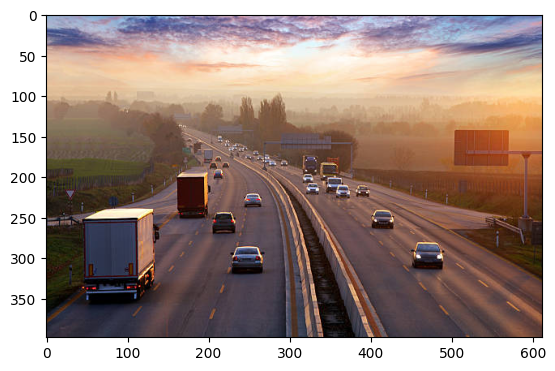

In [14]:

plt.imshow(image)

In [15]:
image = torch.from_numpy(image).permute(2,0,1).unsqueeze(0)
image.shape

torch.Size([1, 3, 398, 612])

In [16]:
import torch.nn as nn

In [17]:
# Define the convolutional layer
conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
pool = nn.AdaptiveAvgPool2d(398)

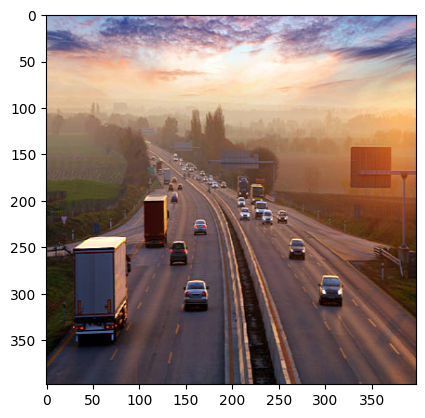

In [18]:
plt.imshow(pool(image).squeeze(0).permute(1,2,0).detach().numpy())

In [19]:
image_conv1 = conv1(image)
batch = nn.BatchNorm2d(3)
act= nn.SiLU()
image_conv= act(batch(image_conv1))

In [20]:
image_conv1.shape

torch.Size([1, 3, 398, 612])

In [21]:
image_conv.squeeze(0).permute(1,2,0).detach().numpy().shape

(398, 612, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.27846456..8.7181225].


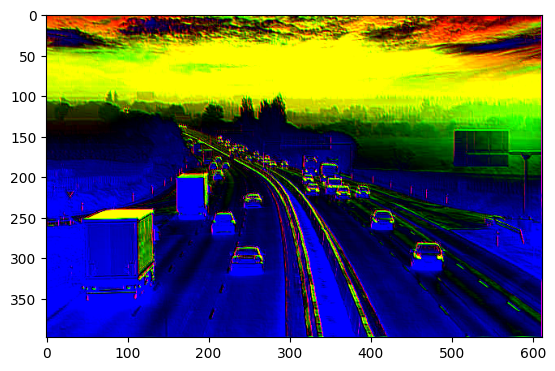

In [22]:
plt.imshow(image_conv.squeeze(0).permute(1,2,0).detach().numpy())

In [23]:
class CNNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, groups=1
                ):
        super(CNNBlock, self).__init__()
        self.cnn = nn.Conv2d(
        in_channels,
        out_channels,
        kernel_size,
        stride,
        padding,
        groups=groups,
        bias=False,
        )
        self.bn = nn.BatchNorm2d(out_channels)
        self.silu = nn.ReLU() # SiLU <-> Swish

    def forward(self, x):
        return self.silu(self.bn(self.cnn(x)))
        

In [24]:
cnn = CNNBlock(3,3,3,1,1,3)
image_cnn = cnn(image)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..9.085507].


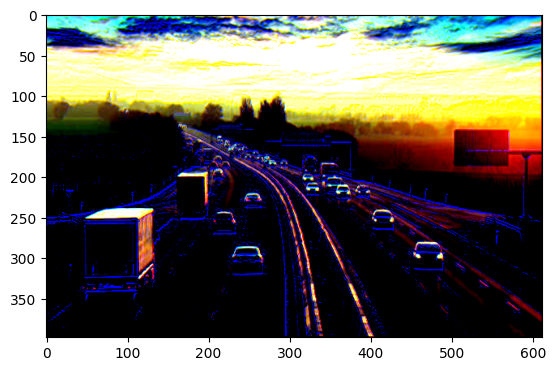

In [25]:
plt.imshow(image_cnn.squeeze(0).permute(1,2,0).detach().numpy())

In [86]:
class SqueezeExcitation(nn.Module):
    def __init__(self, in_channels, reduced_dim):
        super(SqueezeExcitation, self).__init__()
        self.se = nn.Sequential(
            #nn.AdaptiveAvgPool2d(1), # C x H X W -> C X 1 X 1
            nn.Conv2d(in_channels,reduced_dim, 1),
            nn.SiLU(),
            nn.BatchNorm2d(reduced_dim),
            nn.Conv2d(reduced_dim, in_channels, 1),
            nn.SiLU(),
            nn.BatchNorm2d(in_channels),
        )
    def forward(self, x):
        return x * self.se(x)

In [87]:
se = SqueezeExcitation(3, 3 * 4)
image_se = se(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.007791..2.367513].


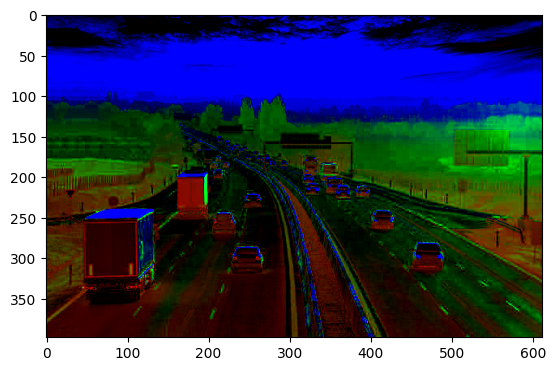

In [88]:
plt.imshow(image_se.squeeze(0).permute(1,2,0).detach().numpy())

In [89]:
b = torch.rand(image.shape[0], 1, 1, 1, device = image.device)<0.8
b

tensor([[[[True]]]])

In [90]:
torch.div(image, 0.8)*b 

tensor([[[[0.6912, 0.6961, 0.7108,  ..., 0.4265, 0.4461, 0.4608],
          [0.6961, 0.6961, 0.7108,  ..., 0.4755, 0.4902, 0.5049],
          [0.6961, 0.7010, 0.7059,  ..., 0.5196, 0.5294, 0.5392],
          ...,
          [0.2549, 0.2549, 0.2598,  ..., 0.4412, 0.4363, 0.4265],
          [0.2500, 0.2549, 0.2549,  ..., 0.4412, 0.4363, 0.4265],
          [0.2549, 0.2549, 0.2598,  ..., 0.4461, 0.4363, 0.4314]],

         [[0.8578, 0.8529, 0.8480,  ..., 0.5000, 0.5098, 0.5147],
          [0.8627, 0.8627, 0.8578,  ..., 0.5588, 0.5735, 0.5784],
          [0.8725, 0.8676, 0.8676,  ..., 0.6127, 0.6324, 0.6422],
          ...,
          [0.2353, 0.2353, 0.2402,  ..., 0.2990, 0.2941, 0.2843],
          [0.2304, 0.2353, 0.2353,  ..., 0.2990, 0.2941, 0.2843],
          [0.2353, 0.2353, 0.2402,  ..., 0.3039, 0.2941, 0.2892]],

         [[1.0392, 1.0392, 1.0294,  ..., 0.7696, 0.7794, 0.7892],
          [1.0441, 1.0343, 1.0343,  ..., 0.8333, 0.8480, 0.8578],
          [1.0392, 1.0392, 1.0294,  ..., 0

In [91]:
class CNNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, groups=1
                ):
        super(CNNBlock, self).__init__()
        self.cnn = nn.Conv2d(
        in_channels,
        out_channels,
        kernel_size,
        stride,
        padding,
        groups=groups,
        bias=False,
        )
        self.bn = nn.BatchNorm2d(out_channels)
        self.silu = nn.SiLU() # SiLU <-> Swish

    def forward(self, x):
        return self.silu(self.bn(self.cnn(x)))

class SqueezeExcitation(nn.Module):
    def __init__(self, in_channels, reduced_dim):
        super(SqueezeExcitation, self).__init__()
        self.se = nn.Sequential(
            #nn.AdaptiveAvgPool2d(1), # C x H X W -> C X 1 X 1
            nn.Conv2d(in_channels,reduced_dim, 1),
            nn.SiLU(),
            nn.BatchNorm2d(reduced_dim),
            nn.Conv2d(reduced_dim, in_channels, 1),
            nn.SiLU(),
            nn.BatchNorm2d(in_channels),
        )
    def forward(self, x):
        return x * self.se(x)
class InvertedResidualBlock(nn.Module):
    def __init__(
        self,
        in_channels,
        out_channels,
        kernel_size,
        stride,
        padding,
        expand_ratio,
        reduction = 4,# Squeezeexcitation
        survival_prob = 0.8, # for stochastic depth
    ):
        super(InvertedResidualBlock, self).__init__()
        self.survival_prob = survival_prob
        self.use_residual = in_channels == out_channels and stride == 1
        hidden_dim = in_channels * expand_ratio
        self.expand = in_channels != hidden_dim
        reduced_dim = max(1, int(in_channels / reduction))

        if self.expand:
            self.expand_conv = CNNBlock(
                in_channels, hidden_dim, kernel_size=3, stride=1, padding=1,groups=in_channels
            )

        self.conv = nn.Sequential(CNNBlock(
                hidden_dim, hidden_dim, kernel_size, stride, padding, groups=hidden_dim,
                                         ),
                SqueezeExcitation(hidden_dim, reduced_dim),
                nn.Conv2d(hidden_dim, out_channels, 1, bias=False),
                nn.BatchNorm2d(out_channels),                 
                )

    def stochastic_depth(self, x):
        if not self.training:
            return x
        binary_tensor = torch.rand(x.shape[0], 1, 1, 1, device = x.device) < self.survival_prob
        return torch.div(x, self.survival_prob) * binary_tensor


    def forward(self, inputs):
        x = self.expand_conv(inputs) if self.expand else inputs

        if self.use_residual:
            return self.stochastic_depth(self.conv(x)) + inputs

        else:
            return self.conv(x)

model = InvertedResidualBlock(
        in_channels = 3,
        out_channels = 3,
        kernel_size =3,
        stride =1,
        padding =1,
        expand_ratio= 4)

image_ie = model(image)

In [92]:
image_ie.shape

torch.Size([1, 3, 398, 612])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-121.56211..122.330246].


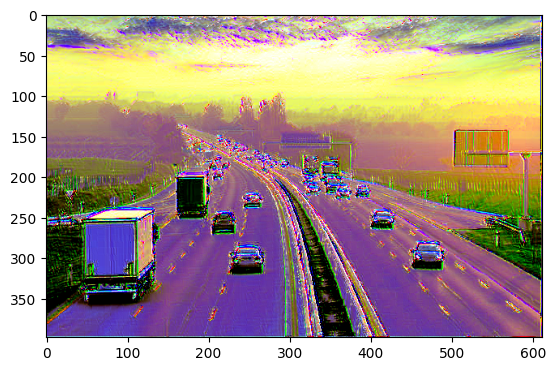

In [93]:
plt.imshow(image_ie.squeeze(0).permute(1,2,0).detach().numpy())

In [94]:
class SqueezeExcitation(nn.Module):
    def __init__(self, in_channels, reduced_dim):
        super(SqueezeExcitation, self).__init__()
        self.se = nn.Sequential(
            #nn.AdaptiveAvgPool2d(1), # C x H X W -> C X 1 X 1
            nn.Conv2d(in_channels,reduced_dim, kernel_size=3, stride=1,padding=2, groups = math.gcd(in_channels,reduced_dim)),
            nn.SiLU(),
            nn.BatchNorm2d(reduced_dim),
            nn.ConvTranspose2d(reduced_dim, in_channels, kernel_size=3, stride=1,padding=2, groups =math.gcd(in_channels,reduced_dim)),
            nn.SiLU(),
            nn.BatchNorm2d(in_channels),
        )
    def forward(self, x):
        return x * self.se(x)

In [95]:
se = SqueezeExcitation(3, 3 * 4)
image_se = se(image)

In [96]:
image_se.shape

torch.Size([1, 3, 398, 612])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0795071..14.626435].


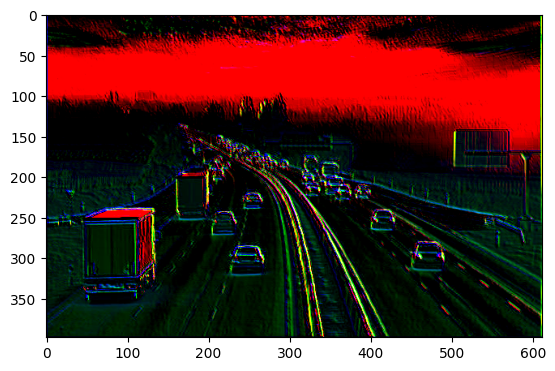

In [97]:
plt.imshow(image_se.squeeze(0).permute(1,2,0).detach().numpy())

In [98]:
class InvertedResidualBlock(nn.Module):
    def __init__(
        self,
        in_channels,
        out_channels,
        kernel_size,
        stride,
        padding,
        expand_ratio,
        reduction = 4,# Squeezeexcitation
        survival_prob = 0.8, # for stochastic depth
    ):
        super(InvertedResidualBlock, self).__init__()
        self.survival_prob = survival_prob
        self.use_residual = in_channels == out_channels and stride == 1
        hidden_dim = in_channels * expand_ratio
        self.expand = in_channels != hidden_dim
        reduced_dim = max(1, int(in_channels / reduction))

        if self.expand:
            self.expand_conv = CNNBlock(
                in_channels, hidden_dim, kernel_size=3, stride=1, padding=1,groups=in_channels
            )

        self.conv = nn.Sequential(CNNBlock(
                hidden_dim, hidden_dim, kernel_size, stride, padding, groups=hidden_dim,
                                         ),
                SqueezeExcitation(hidden_dim, reduced_dim),
                nn.Conv2d(hidden_dim, out_channels, 1, bias=False),
                nn.BatchNorm2d(out_channels),                 
                )

    def stochastic_depth(self, x):
        if not self.training:
            return x
        binary_tensor = torch.rand(x.shape[0], 1, 1, 1, device = x.device) < self.survival_prob
        return torch.div(x, self.survival_prob) * binary_tensor

    def forward(self, inputs):
        x = self.expand_conv(inputs) if self.expand else inputs

        if self.use_residual:
            return self.stochastic_depth(self.conv(x)) + inputs

        else:
            return self.conv(x)

model = InvertedResidualBlock(
        in_channels = 3,
        out_channels = 3,
        kernel_size =3,
        stride =1,
        padding =1,
        expand_ratio= 4)

image_ie = model(image)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-104.70842..38.16346].


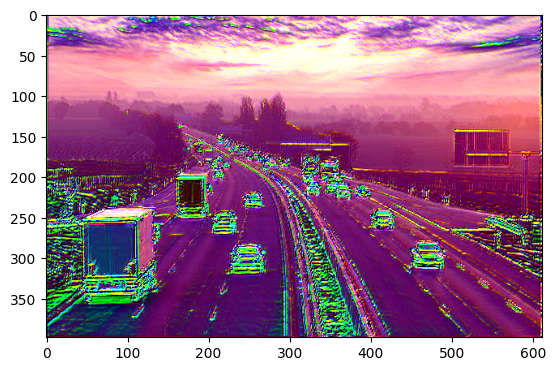

In [99]:
plt.imshow(image_ie.squeeze(0).permute(1,2,0).detach().numpy())

In [100]:
import torch
import torch.nn as nn
import math

# Standard 2D convolution (downsampling)
conv = nn.Conv2d(in_channels=3, out_channels=9, kernel_size=3, stride=1,padding =1, groups = math.gcd(3,9))
batch1 = nn.BatchNorm2d(9)
act= nn.SiLU()
conv1 = nn.Conv2d(in_channels=9, out_channels=9, kernel_size=1)
batch2 = nn.BatchNorm2d(9)

output_tensor = batch2(act(conv1(batch1(act(conv(image))))))
print("Conv2D Output Shape:", output_tensor.shape)  # Output: (1, 16, 32, 32)

# Transposed convolution (upsampling)
conv_transpose = nn.ConvTranspose2d(in_channels=9, out_channels=3, kernel_size=3, stride=1,padding=1,groups =math.gcd(9,3) )
batch3 = nn.BatchNorm2d(3)
act= nn.SiLU()
conv_trans = nn.ConvTranspose2d(in_channels=3, out_channels=3, kernel_size=1)
batch4 = nn.BatchNorm2d(3)
act= nn.SiLU()
output_tensor_transposed = batch4(act(conv_trans(batch3(act(conv_transpose(output_tensor))))))
print("ConvTranspose2D Output Shape:", output_tensor_transposed.shape)  # Output: (1, 3, 64, 64)


Conv2D Output Shape: torch.Size([1, 9, 398, 612])
ConvTranspose2D Output Shape: torch.Size([1, 3, 398, 612])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2627795..25.04278].


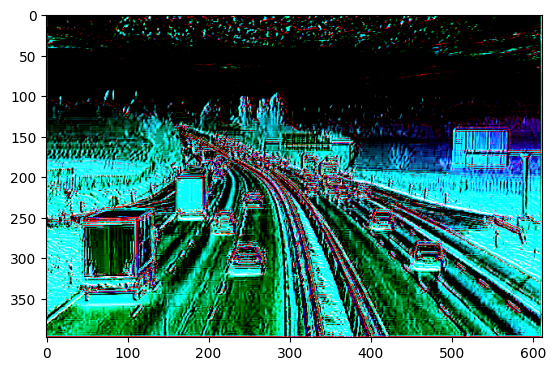

In [101]:
plt.imshow(output_tensor_transposed.squeeze(0).permute(1,2,0).detach().numpy())

In [102]:
import torch
import torch.nn as nn

# Standard 2D convolution (downsampling)
conv = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=2, padding=1)
input_tensor = torch.randn(1, 3, 64, 64)  # (batch_size, channels, height, width)
output_tensor = conv(image)
print("Conv2D Output Shape:", output_tensor.shape)  # Output: (1, 16, 32, 32)

# Transposed convolution (upsampling)
conv_transpose = nn.ConvTranspose2d(in_channels=16, out_channels=3, kernel_size=3, stride=2, padding=1, output_padding=1)
output_tensor_transposed = conv_transpose(output_tensor)
print("ConvTranspose2D Output Shape:", output_tensor_transposed.shape)  # Output: (1, 3, 64, 64)


Conv2D Output Shape: torch.Size([1, 16, 199, 306])
ConvTranspose2D Output Shape: torch.Size([1, 3, 398, 612])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8949244..0.47877267].


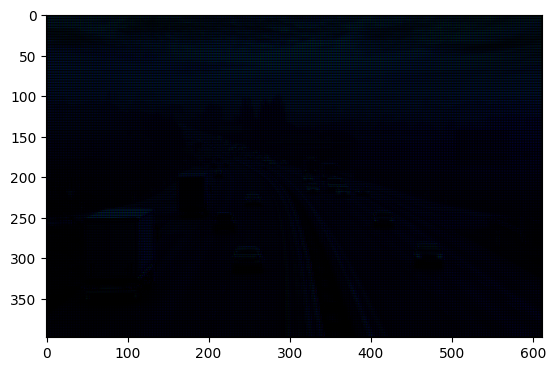

In [103]:
plt.imshow(output_tensor_transposed.squeeze(0).permute(1,2,0).detach().numpy())

In [104]:
# Standard 2D convolution (downsampling)
conv = nn.Conv2d(in_channels=12, out_channels=16, kernel_size=3, stride=1, padding=1, groups = math.gcd(12,16))
input_tensor = torch.randn(1, 3, 64, 64)  # (batch_size, channels, height, width)
output_tensor = conv(input_tensor)
print("Conv2D Output Shape:", output_tensor.shape)  # Output: (1, 16, 32, 32)

RuntimeError: Given groups=4, weight of size [16, 3, 3, 3], expected input[1, 3, 64, 64] to have 12 channels, but got 3 channels instead

In [105]:
conv_trans = nn.ConvTranspose2d(in_channels=3, out_channels=3, kernel_size=1)
conv_trans(input_tensor).shape

torch.Size([1, 3, 64, 64])

In [106]:
import torch
import torch.nn as nn

# Input tensor shape: (batch_size=1, channels=3, height=398, width=612)
input_tensor = torch.randn(1, 3, 398, 612)  

# Define the ConvTranspose2d layer
conv_transpose = nn.ConvTranspose2d(
    in_channels=3, 
    out_channels=3, 
    kernel_size=3,   # Adjust kernel size as needed
    stride=1,        # Stride of 2 to upsample
    padding=0,       # Padding to control the output size
    output_padding=0 # Adjust for exact size
)

# Apply the transposed convolution
output_tensor = conv_transpose(input_tensor)

print("Output Shape:", output_tensor.shape)  # Should be approximately (1, 3, 597, 918)


Output Shape: torch.Size([1, 3, 400, 614])


In [107]:
image.shape

torch.Size([1, 3, 398, 612])

In [111]:
con = nn.Conv2d(3,3,  kernel_size=3, stride=1, padding=1)
con_im = con(image)

In [112]:
con_im.shape

torch.Size([1, 3, 398, 612])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0157477..0.38892716].


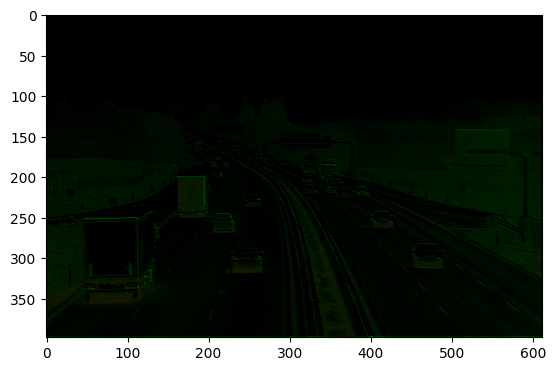

In [113]:
plt.imshow(con_im.squeeze(0).permute(1,2,0).detach().numpy())

In [137]:

class Bottleneck(nn.Module):
    """Standard bottleneck."""

    def __init__(self, c1, c2, shortcut=True, g=1, k=(3, 3), e=0.5):
        """
        Initialize a standard bottleneck module.

        Args:
            c1 (int): Input channels.
            c2 (int): Output channels.
            shortcut (bool): Whether to use shortcut connection.
            g (int): Groups for convolutions.
            k (Tuple[int, int]): Kernel sizes for convolutions.
            e (float): Expansion ratio.
        """
        super().__init__()
        c_ = int(c2 * e)  # hidden channels
        self.cv1 = Conv(c1, c_, k[0], 1)
        self.cv2 = Conv(c_, c2, k[1], 1, g=g)
        self.add = shortcut and c1 == c2

    def forward(self, x):
        """Apply bottleneck with optional shortcut connection."""
        return x + self.cv2(self.cv1(x)) if self.add else self.cv2(self.cv1(x))

class C2f(nn.Module):
    """Faster Implementation of CSP Bottleneck with 2 convolutions."""

    def __init__(self, c1, c2, n=1, shortcut=False, g=1, e=0.5):
        """
        Initialize a CSP bottleneck with 2 convolutions.

        Args:
            c1 (int): Input channels.
            c2 (int): Output channels.
            n (int): Number of Bottleneck blocks.
            shortcut (bool): Whether to use shortcut connections.
            g (int): Groups for convolutions.
            e (float): Expansion ratio.
        """
        super().__init__()
        self.c = int(c2 * e)  # hidden channels
        self.cv1 = Conv(c1, 2 * self.c, 1, 1)
        self.cv2 = Conv((2 + n) * self.c, c2, 1)  # optional act=FReLU(c2)
        self.m = nn.ModuleList(Bottleneck(self.c, self.c, shortcut, g, k=((3, 3), (3, 3)), e=1.0) for _ in range(n))

    def forward(self, x):
        """Forward pass through C2f layer."""
        y = list(self.cv1(x).chunk(2, 1))
        y.extend(m(y[-1]) for m in self.m)
        return self.cv2(torch.cat(y, 1))

    def forward_split(self, x):
        """Forward pass using split() instead of chunk()."""
        y = self.cv1(x).split((self.c, self.c), 1)
        y = [y[0], y[1]]
        y.extend(m(y[-1]) for m in self.m)
        return self.cv2(torch.cat(y, 1))


class C3(nn.Module):
    """CSP Bottleneck with 3 convolutions."""

    def __init__(self, c1, c2, n=1, shortcut=True, g=1, e=0.5):
        """
        Initialize the CSP Bottleneck with 3 convolutions.

        Args:
            c1 (int): Input channels.
            c2 (int): Output channels.
            n (int): Number of Bottleneck blocks.
            shortcut (bool): Whether to use shortcut connections.
            g (int): Groups for convolutions.
            e (float): Expansion ratio.
        """
        super().__init__()
        c_ = int(c2 * e)  # hidden channels
        self.cv1 = Conv(c1, c_, 1, 1)
        self.cv2 = Conv(c1, c_, 1, 1)
        self.cv3 = Conv(2 * c_, c2, 1)  # optional act=FReLU(c2)
        self.m = nn.Sequential(*(Bottleneck(c_, c_, shortcut, g, k=((1, 1), (3, 3)), e=1.0) for _ in range(n)))

    def forward(self, x):
        """Forward pass through the CSP bottleneck with 3 convolutions."""
        return self.cv3(torch.cat((self.m(self.cv1(x)), self.cv2(x)), 1))

class C3k(C3):
    """C3k is a CSP bottleneck module with customizable kernel sizes for feature extraction in neural networks."""

    def __init__(self, c1, c2, n=1, shortcut=True, g=1, e=0.5, k=3):
        """
        Initialize C3k module.

        Args:
            c1 (int): Input channels.
            c2 (int): Output channels.
            n (int): Number of Bottleneck blocks.
            shortcut (bool): Whether to use shortcut connections.
            g (int): Groups for convolutions.
            e (float): Expansion ratio.
            k (int): Kernel size.
        """
        super().__init__(c1, c2, n, shortcut, g, e)
        c_ = int(c2 * e)  # hidden channels
        # self.m = nn.Sequential(*(RepBottleneck(c_, c_, shortcut, g, k=(k, k), e=1.0) for _ in range(n)))
        self.m = nn.Sequential(*(Bottleneck(c_, c_, shortcut, g, k=(k, k), e=1.0) for _ in range(n)))
class C3k2(C2f):
    """Faster Implementation of CSP Bottleneck with 2 convolutions."""

    def __init__(self, c1, c2, n=1, c3k=False, e=0.5, g=1, shortcut=True):
        """
        Initialize C3k2 module.

        Args:
            c1 (int): Input channels.
            c2 (int): Output channels.
            n (int): Number of blocks.
            c3k (bool): Whether to use C3k blocks.
            e (float): Expansion ratio.
            g (int): Groups for convolutions.
            shortcut (bool): Whether to use shortcut connections.
        """
        super().__init__(c1, c2, n, shortcut, g, e)
        self.m = nn.ModuleList(
            C3k(self.c, self.c, 2, shortcut, g) if c3k else Bottleneck(self.c, self.c, shortcut, g) for _ in range(n)
        )


In [159]:
import torch
import torch.nn as nn

# Define Conv helper function
class Conv(nn.Module):
    def __init__(self, c1, c2, k=1, s=1, p=None, g=1, act=True):
        super().__init__()
        self.conv = nn.Conv2d(c1, c2, k, s, (k // 2) if p is None else p, groups=g, bias=False)
        self.bn = nn.BatchNorm2d(c2)
        self.act = nn.ReLU(inplace=True) if act else nn.Identity()
    
    def forward(self, x):
        return self.act(self.bn(self.conv(x)))

# Define Bottleneck class
class Bottleneck(nn.Module):
    def __init__(self, c1, c2, shortcut=True, g=1, k=(3, 3), e=0.5):
        super().__init__()
        c_ = int(c2 * e)  # hidden channels
        self.cv1 = Conv(c1, c_, k[0], 1)
        self.cv2 = Conv(c_, c2, k[1], 1, g=g)
        self.add = shortcut and c1 == c2

    def forward(self, x):
        return x + self.cv2(self.cv1(x)) if self.add else self.cv2(self.cv1(x))

# Define C2f class
class C2f(nn.Module):
    def __init__(self, c1, c2, n=1, shortcut=False, g=1, e=0.5):
        super().__init__()
        self.c = int(c2 * e)
        self.cv1 = Conv(c1, 2 * self.c, 1, 1)
        self.cv2 = Conv((2 + n) * self.c, c2, 1)
        self.m = nn.ModuleList(Bottleneck(self.c, self.c, shortcut, g, k=(3, 3), e=1.0) for _ in range(n))
    
    def forward(self, x):
        y = list(self.cv1(x).chunk(2, 1))
        y.extend(m(y[-1]) for m in self.m)
        return self.cv2(torch.cat(y, 1))

# Define C3 class
class C3(nn.Module):
    def __init__(self, c1, c2, n=1, shortcut=True, g=1, e=0.5):
        super().__init__()
        c_ = int(c2 * e)
        self.cv1 = Conv(c1, c_, 1, 1)
        self.cv2 = Conv(c1, c_, 1, 1)
        self.cv3 = Conv(2 * c_, c2, 1)
        self.m = nn.Sequential(*(Bottleneck(c_, c_, shortcut, g, k=(1, 1), e=1.0) for _ in range(n)))
    
    def forward(self, x):
        return self.cv3(torch.cat((self.m(self.cv1(x)), self.cv2(x)), 1))

# Define C3k class
class C3k(C3):
    def __init__(self, c1, c2, n=1, shortcut=True, g=1, e=0.5, k=3):
        super().__init__(c1, c2, n, shortcut, g, e)
        c_ = int(c2 * e)
        self.m = nn.Sequential(*(Bottleneck(c_, c_, shortcut, g, k=(k, k), e=1.0) for _ in range(n)))

# Define C3k2 class
class C3k2(C2f):
    def __init__(self, c1, c2, n=1, c3k=False, e=0.5, g=1, shortcut=True):
        super().__init__(c1, c2, n, shortcut, g, e)
        self.m = nn.ModuleList(
            C3k(self.c, self.c, 2, shortcut, g) if c3k else Bottleneck(self.c, self.c, shortcut, g) for _ in range(n)
        )


model = C3k2(3, 16, n=2, c3k=True)
output = model(image)
print(output.shape)


torch.Size([1, 16, 398, 612])


In [161]:
# Define the convolutional layer
conv1 = nn.Conv2d(in_channels=16, out_channels=3, kernel_size=3, stride=1, padding=1)
image_conv1 = conv1(output)
batch = nn.BatchNorm2d(3)
act= nn.SiLU()
image_conv= act(batch(image_conv1))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.27846456..9.620562].


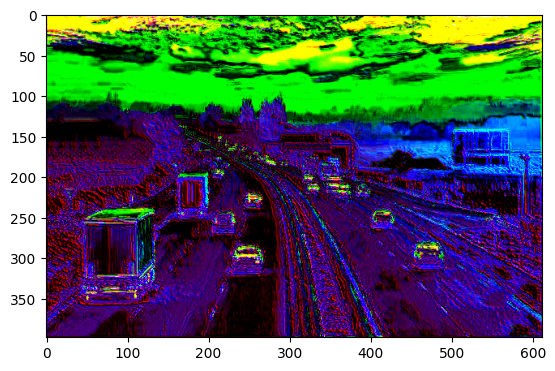

In [162]:
plt.imshow(image_conv.squeeze(0).permute(1,2,0).detach().numpy())

In [9]:
image.shape

torch.Size([1, 3, 398, 612])

In [13]:
torch.cat([image, image], dim=1).shape

torch.Size([1, 6, 398, 612])

In [2]:
groups = 3
x = image.clone() 
batch_size, num_channels, height, width = x.shape
channels_per_group = num_channels // groups
channels_per_group 

NameError: name 'image' is not defined

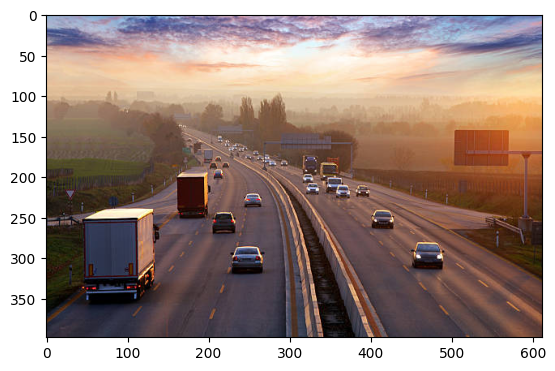

In [30]:
plt.imshow(x.squeeze(0).permute(1,2,0).detach().numpy())

In [31]:
x = x.view(batch_size, groups, channels_per_group, height, width)
x.shape

torch.Size([1, 3, 1, 398, 612])

In [32]:
x = x.permute(0, 2, 1, 3, 4)
x.shape

torch.Size([1, 1, 3, 398, 612])

In [33]:
x = x.reshape(batch_size, num_channels, height, width)

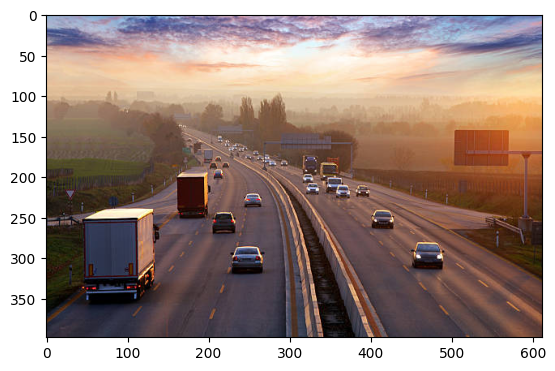

In [34]:
plt.imshow(x.squeeze(0).permute(1,2,0).detach().numpy())

In [35]:
pool = nn.AdaptiveAvgPool2d(1)
pool(x).shape

torch.Size([1, 3, 1, 1])

In [38]:
import torch
import torch.nn as nn

class AdaptiveDynamicConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, reduction=4):
        super(AdaptiveDynamicConv, self).__init__()

        # 1️⃣ Dynamic Kernel Generation (Using a Small Network)
        self.kernel_gen = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),  # Global Context
            nn.Conv2d(in_channels, in_channels // reduction, kernel_size=1),  # Reduce Dim
            nn.ReLU(),
            nn.Conv2d(in_channels // reduction, in_channels * kernel_size * kernel_size, kernel_size=1),  # Expand to Kernel Weights
            nn.Sigmoid()  # Normalize to [0,1]
        )

        # 2️⃣ Standard Depthwise Convolution (Dynamic Kernels)
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, groups=in_channels, bias=False)

    def forward(self, x):
        batch, channels, height, width = x.shape
        
        # Generate dynamic kernel weights
        kernel_weights = self.kernel_gen(x)  # Shape: (B, C*K*K, 1, 1)
        kernel_weights = kernel_weights.view(batch, channels, 3, 3)  # Reshape for 3x3 Kernel

        # Apply dynamic convolution
        out = self.conv(x)
        out = out * kernel_weights  # Multiply input with dynamically generated kernel

        return out

# Example usage
#x = torch.randn(1, 16, 32, 32)  # Batch=1, 16 channels, 32x32 image
model = AdaptiveDynamicConv(in_channels=3, out_channels=3)
output = model(x)

print("Output Shape:", output.shape)  # Expected: (1, 16, 32, 32)


RuntimeError: Given groups=1, expected weight to be at least 1 at dimension 0, but got weight of size [0, 3, 1, 1] instead

In [1]:
import torch
import torch.nn as nn
import math

class AdaptiveDynamicConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, reduction=1):
        super(AdaptiveDynamicConv, self).__init__()

        # 1️⃣ Dynamic Kernel Generation (Using a Small Network)
        self.kernel_gen = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),  # Global Context
            nn.Conv2d(in_channels, in_channels // reduction, kernel_size=1),  # Reduce Dim
            nn.ReLU(),
            nn.Conv2d(in_channels // reduction, in_channels * kernel_size * kernel_size, kernel_size=1),  # Expand to Kernel Weights
            nn.Sigmoid()  # Normalize to [0,1]
        )

        # 2️⃣ Standard Depthwise Convolution (Dynamic Kernels)
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, groups=math.gcd(in_channels, out_channels), bias=False)

    def forward(self, x):
        batch, channels, height, width = x.shape
        
        # Generate dynamic kernel weights
        kernel_weights = self.kernel_gen(x)  # Shape: (B, C*K*K, 1, 1)
        kernel_weights = kernel_weights.view(batch, channels, 3, 3)  # Reshape for 3x3 Kernel
        
        # Convolve using depthwise convolution
        out = self.conv(x)  # Apply depthwise convolution

        # Ensure the kernel_weights have the correct shape for broadcasting
        kernel_weights = kernel_weights.unsqueeze(2).unsqueeze(3)  # Shape: (B, C, 1, 1, 3, 3)

        # Broadcast the kernel weights to match the output dimensions (B, C, H, W)
        kernel_weights = kernel_weights.expand(-1, -1, height, width, -1, -1)  # Shape: (B, C, H, W, 3, 3)

        # Apply dynamic modulation (this needs to be done properly for each output pixel)
        out = out * kernel_weights.sum(dim=[4, 5])
        
        return out

# Example usage
#x = torch.randn(1, 3, 32, 32)  # Batch=1, 3 channels, 32x32 image
model = AdaptiveDynamicConv(in_channels=3, out_channels=16)
output = model(x)

print("Output Shape:", output.shape)


NameError: name 'x' is not defined

In [60]:
kernel_gen = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),  # Global Context
            nn.Conv2d(3, 3, kernel_size=1),  # Reduce Dim
            nn.ReLU(),
            nn.Conv2d(3,27,kernel_size=1),  # Expand to Kernel Weights
            nn.Sigmoid()  # Normalize to [0,1]
        )

In [47]:
kernel_weights = kernel_gen(x)
kernel_weights

tensor([[[[0.5236]],

         [[0.6144]],

         [[0.4249]],

         [[0.6362]],

         [[0.5756]],

         [[0.5386]],

         [[0.4737]],

         [[0.3764]],

         [[0.6110]],

         [[0.5527]],

         [[0.5008]],

         [[0.6040]],

         [[0.3429]],

         [[0.3872]],

         [[0.4530]],

         [[0.4458]],

         [[0.5638]],

         [[0.4624]],

         [[0.4052]],

         [[0.3772]],

         [[0.3824]],

         [[0.4406]],

         [[0.6138]],

         [[0.3655]],

         [[0.5856]],

         [[0.4280]],

         [[0.6519]]]], grad_fn=<SigmoidBackward0>)

In [49]:
kernel_weights = kernel_weights.view(1, 3, 3, 3) 
kernel_weights.shape


torch.Size([1, 3, 3, 3])

In [50]:
conv = nn.Conv2d(in_channels= 3, out_channels =3, kernel_size=3, stride=1, padding=1, groups=3, bias=False)

In [52]:
x1 = conv(x)
x1.shape

torch.Size([1, 3, 398, 612])

In [54]:
x1 = x1 * kernel_weights 

RuntimeError: The size of tensor a (612) must match the size of tensor b (3) at non-singleton dimension 3

In [55]:
kernel_weights = kernel_weights.unsqueeze(2).unsqueeze(3)  # Shape: (B, C, 1, 1, 3, 3)

# Broadcast the kernel weights to match the output dimensions (B, C, H, W)
kernel_weights = kernel_weights.expand(-1, -1, height, width, -1, -1)  # Shape: (B, C, H, W, 3, 3)

# Apply dynamic modulation (this needs to be done properly for each output pixel)
x1 = x1 * kernel_weights.sum(dim=[4, 5])

In [56]:
x1

tensor([[[[ 0.4955,  0.5142,  0.5175,  ...,  0.4054,  0.4079,  0.0658],
          [ 0.4858,  0.3510,  0.3498,  ...,  0.3227,  0.3273,  0.1614],
          [ 0.5007,  0.3534,  0.3616,  ...,  0.3326,  0.3320,  0.1494],
          ...,
          [ 0.1718,  0.1239,  0.1215,  ...,  0.2152,  0.2070,  0.0925],
          [ 0.1833,  0.1264,  0.1298,  ...,  0.2221,  0.2139,  0.0949],
          [-0.0727, -0.2949, -0.3007,  ..., -0.5317, -0.5190, -0.6124]],

         [[-0.7386, -1.1642, -1.1640,  ..., -0.7453, -0.7485,  0.0219],
          [-1.1857, -1.8766, -1.8790,  ..., -1.2455, -1.2559,  0.0728],
          [-1.2002, -1.8934, -1.8935,  ..., -1.3579, -1.3744,  0.0783],
          ...,
          [-0.3321, -0.5227, -0.5222,  ..., -0.6457, -0.6303,  0.0248],
          [-0.3261, -0.5211, -0.5211,  ..., -0.6452, -0.6291,  0.0236],
          [-0.1200, -0.3184, -0.3182,  ..., -0.4033, -0.3940, -0.0320]],

         [[-1.0447,  0.0128,  0.0088,  ...,  0.0772,  0.0743, -0.5231],
          [-0.1334,  1.1906,  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.775481..2.234593].


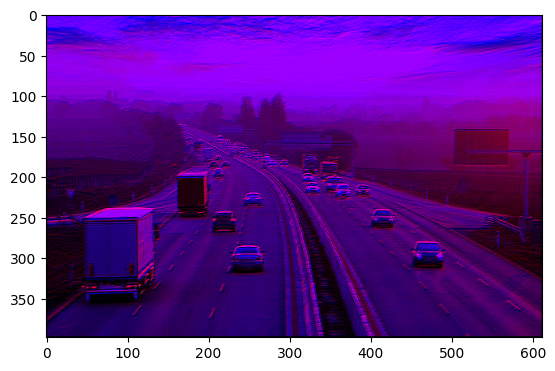

In [57]:
plt.imshow(x1.squeeze(0).permute(1,2,0).detach().numpy())

In [78]:
depth_conv = nn.Sequential(
    nn.Conv2d(3, 9, 1, stride= 1,groups=3),
    nn.Conv2d(9, 9, 1))

In [79]:
depth_conv(image).shape

torch.Size([1, 9, 398, 612])

In [75]:
image.shape

torch.Size([1, 3, 398, 612])

In [ ]:
# BLock

class RepCNN(nn.Module):
    def __init__(in_channels, out_channels, sqop